In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from cuml.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


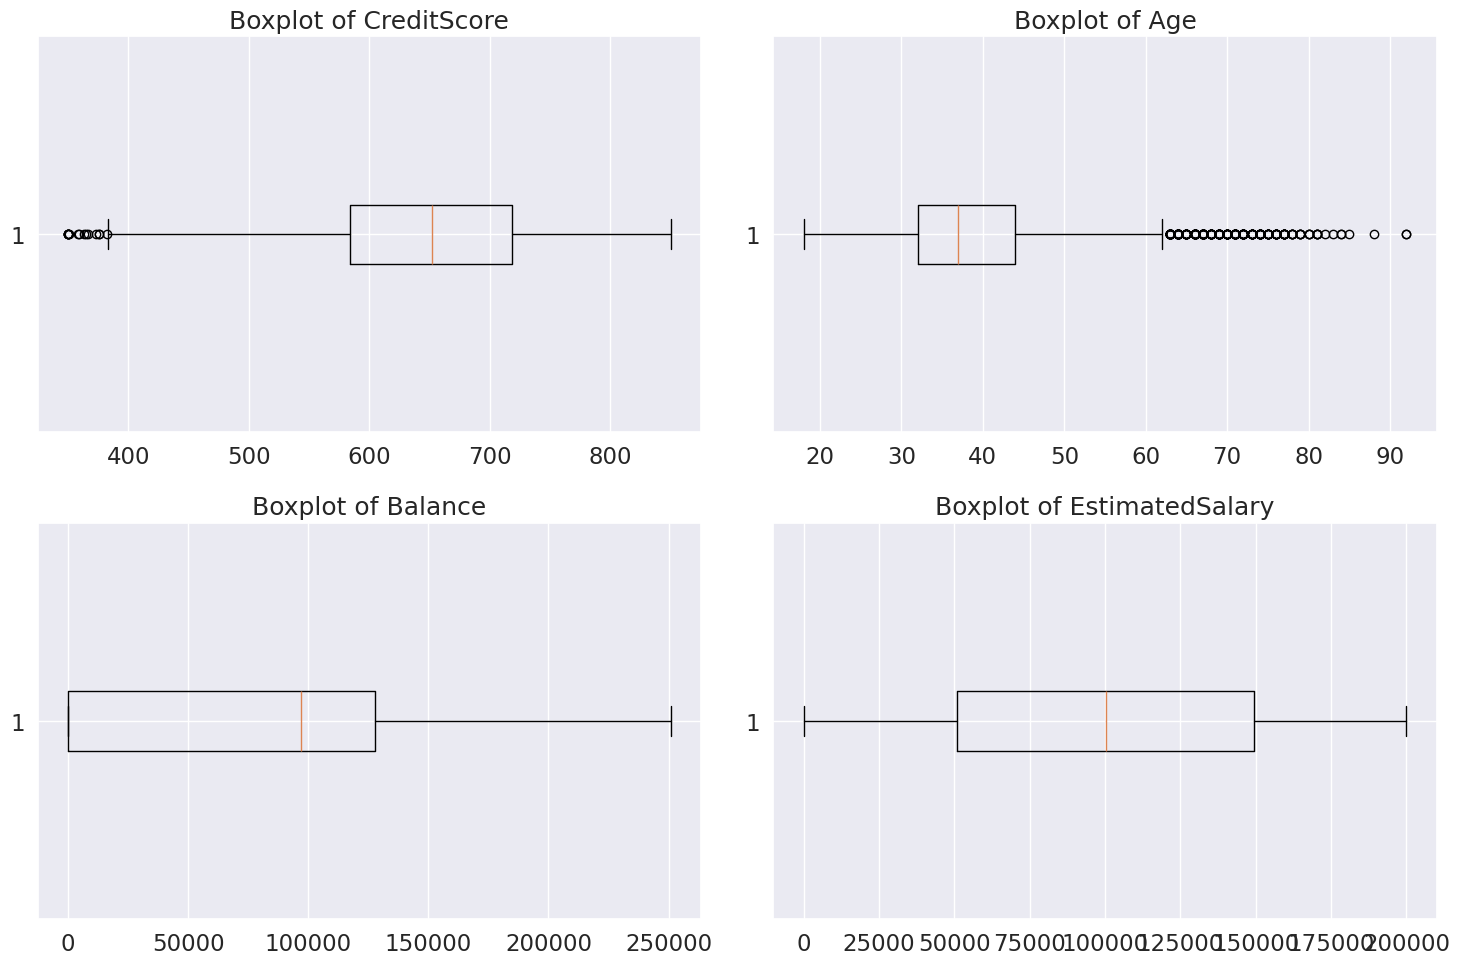

In [ ]:
num_cols=['CreditScore','Age','Balance','EstimatedSalary']
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    plt.boxplot(df[col],vert=False)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df['CreditScore'].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


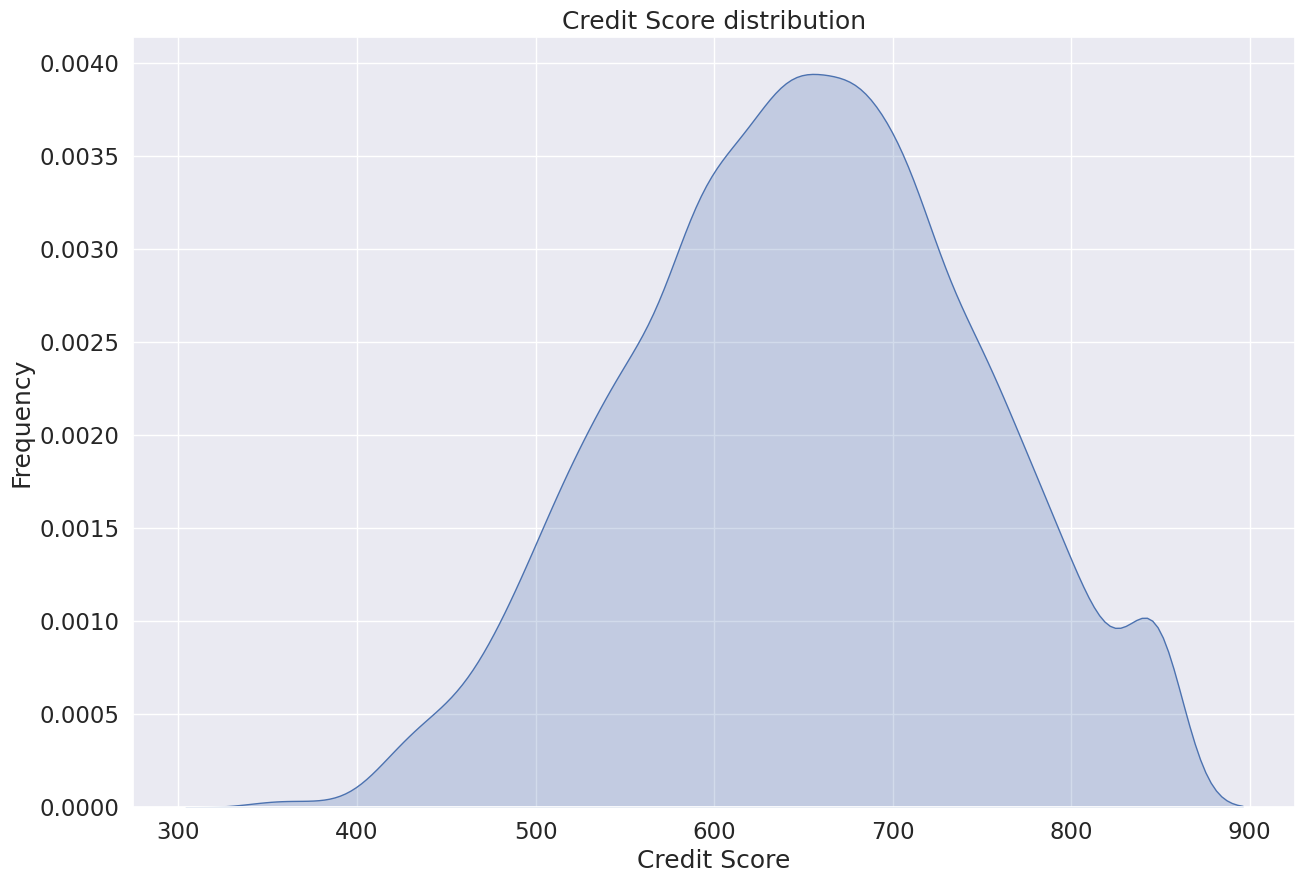

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(df['CreditScore'],fill=True)
plt.title('Credit Score distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


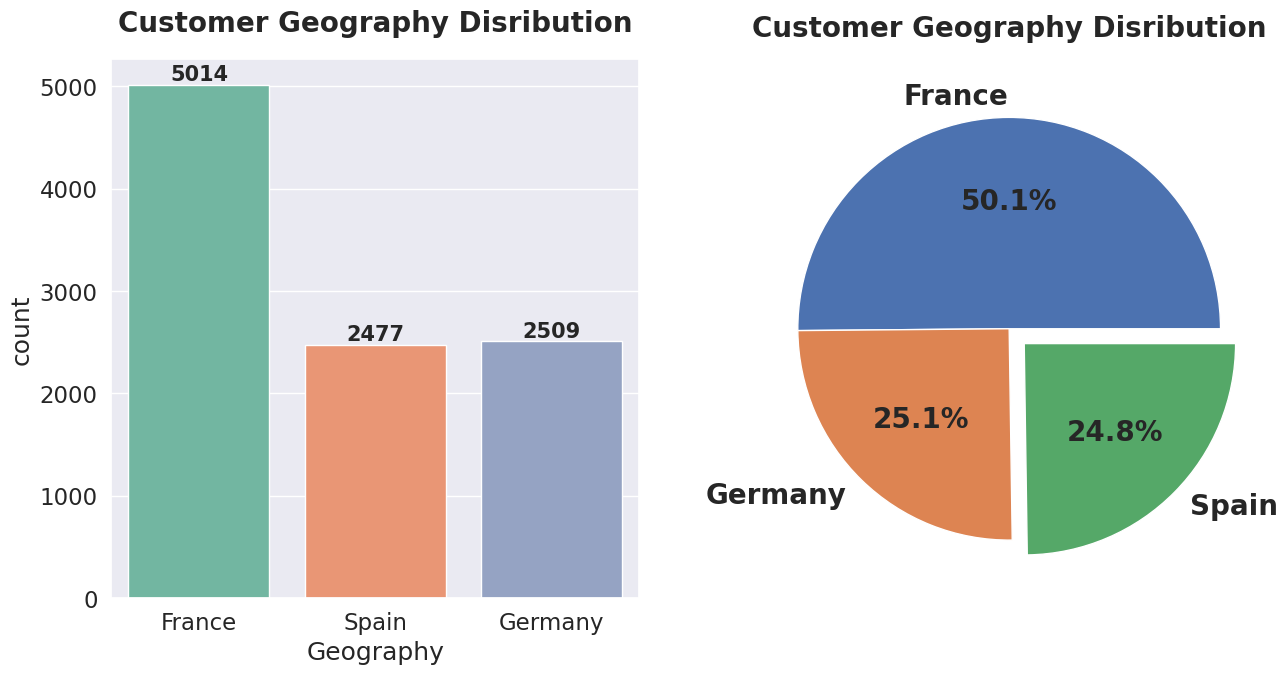

In [ ]:
Geography=df['Geography'].value_counts()
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(Geography.values,labels=Geography.index,autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black",'size':20},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


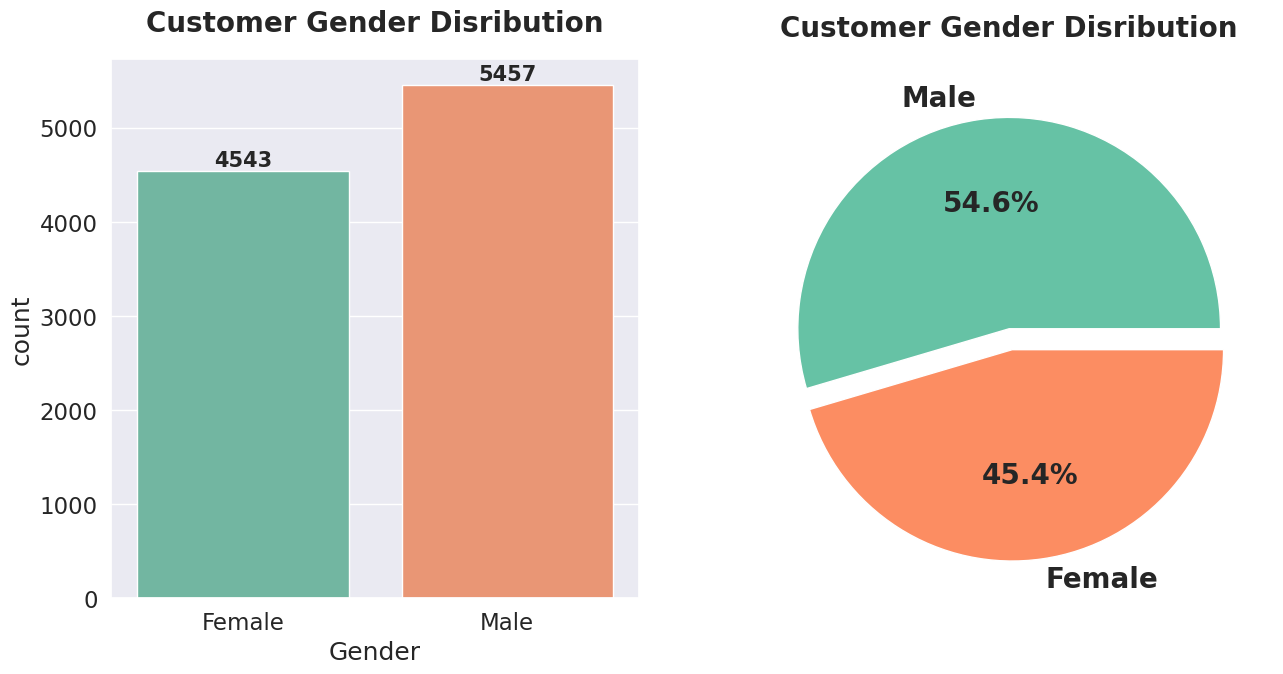

In [ ]:
gender=df['Gender'].value_counts()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
ax=sns.countplot(data=df,x='Gender',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=15)

plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(gender.values,labels=gender.index,autopct='%1.1f%%',colors=sns.set_palette("Set2"),
        textprops={'fontweight':'black','size':20},explode=[0,0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
df['Age'].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


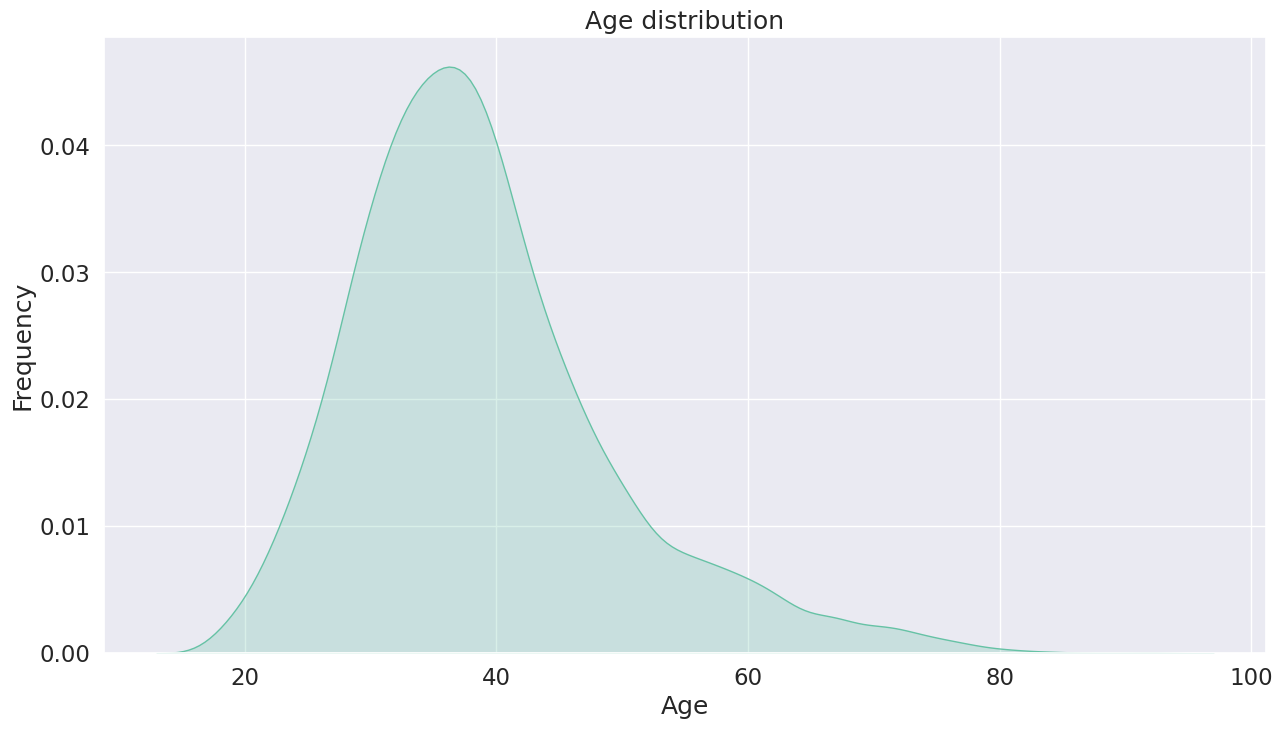

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Age'],fill=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


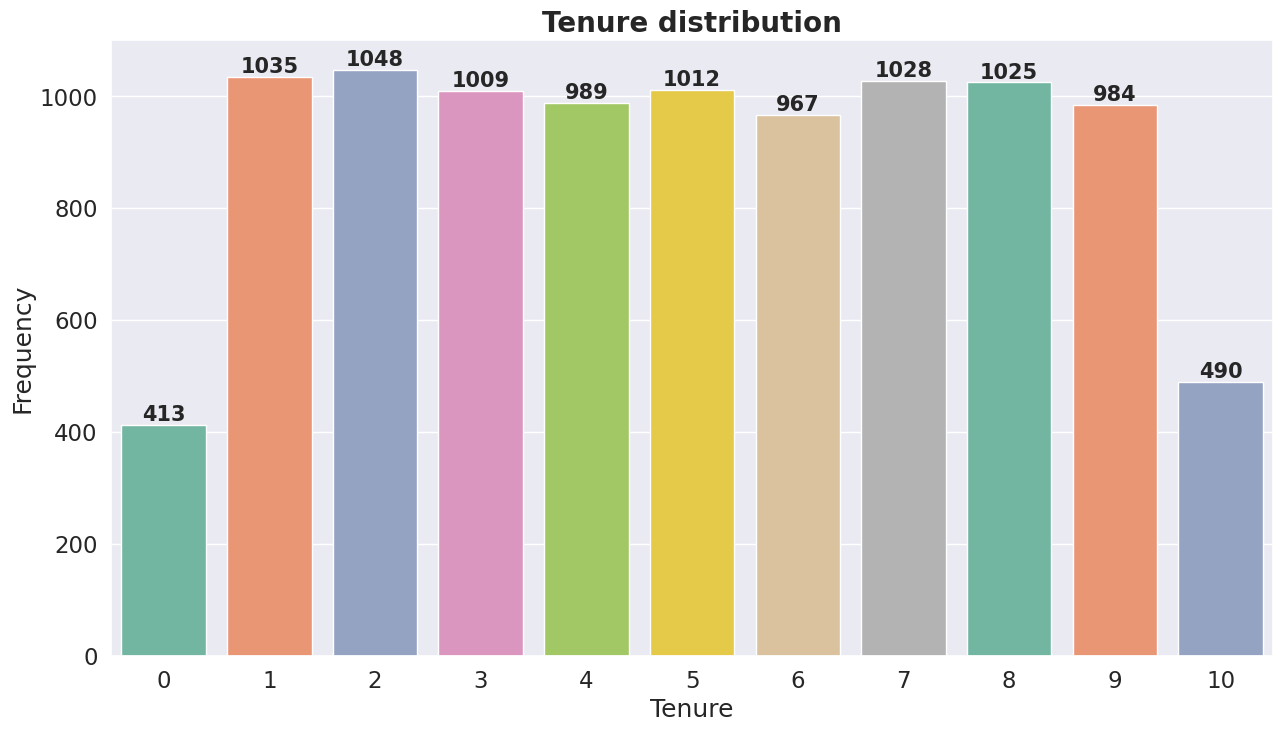

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='Tenure',palette="Set2")
for container in ax.containers:
    ax.bar_label(container,fontweight='black',size=15)
plt.title('Tenure distribution',fontweight='black',size=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

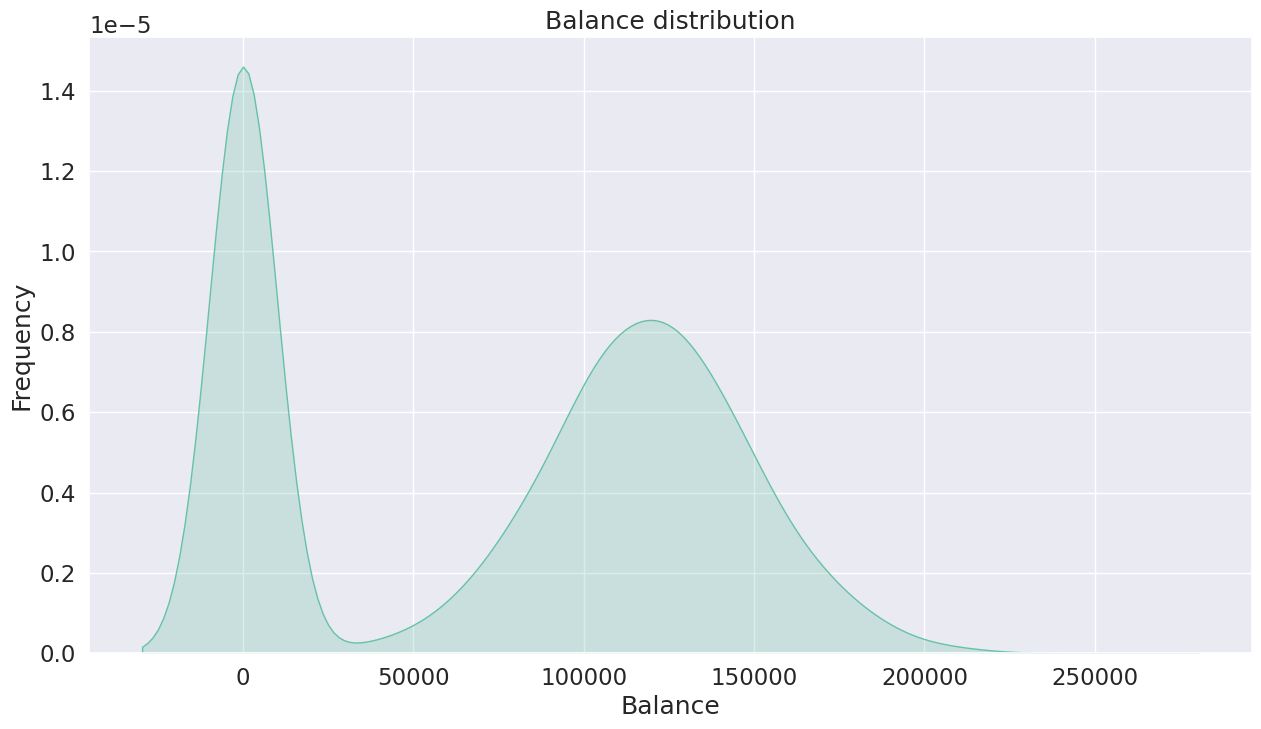

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Balance'],fill=True)
plt.title('Balance distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


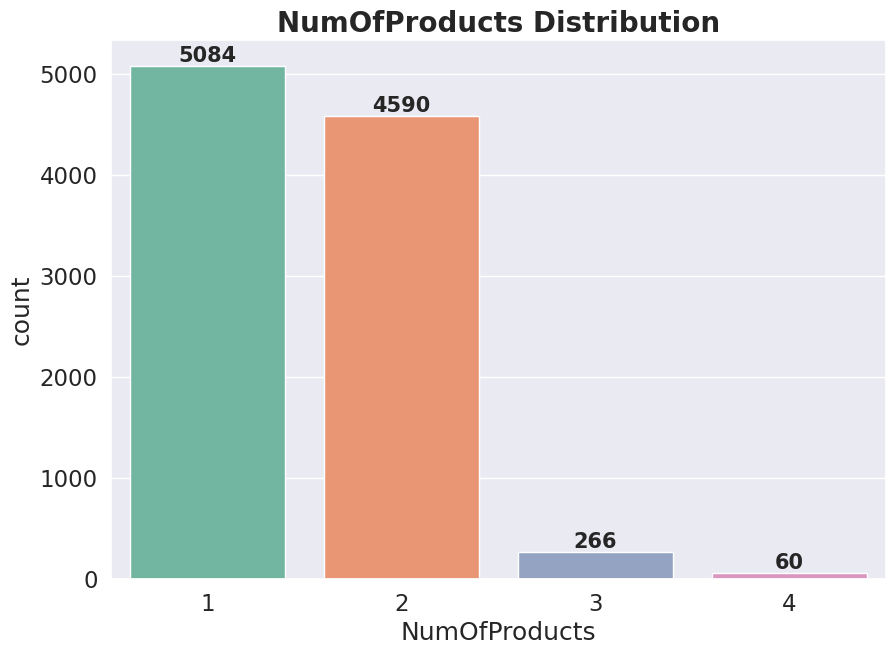

In [ ]:
count=df['NumOfProducts'].value_counts()
plt.figure(figsize=(10,7))

ax=sns.countplot(data=df,x='NumOfProducts',palette=('Set2'))
for container in ax.containers:
     ax.bar_label(container,fontweight="black",size=15)
plt.title('NumOfProducts Distribution',fontweight="black",size=20)
plt.show()

In [ ]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


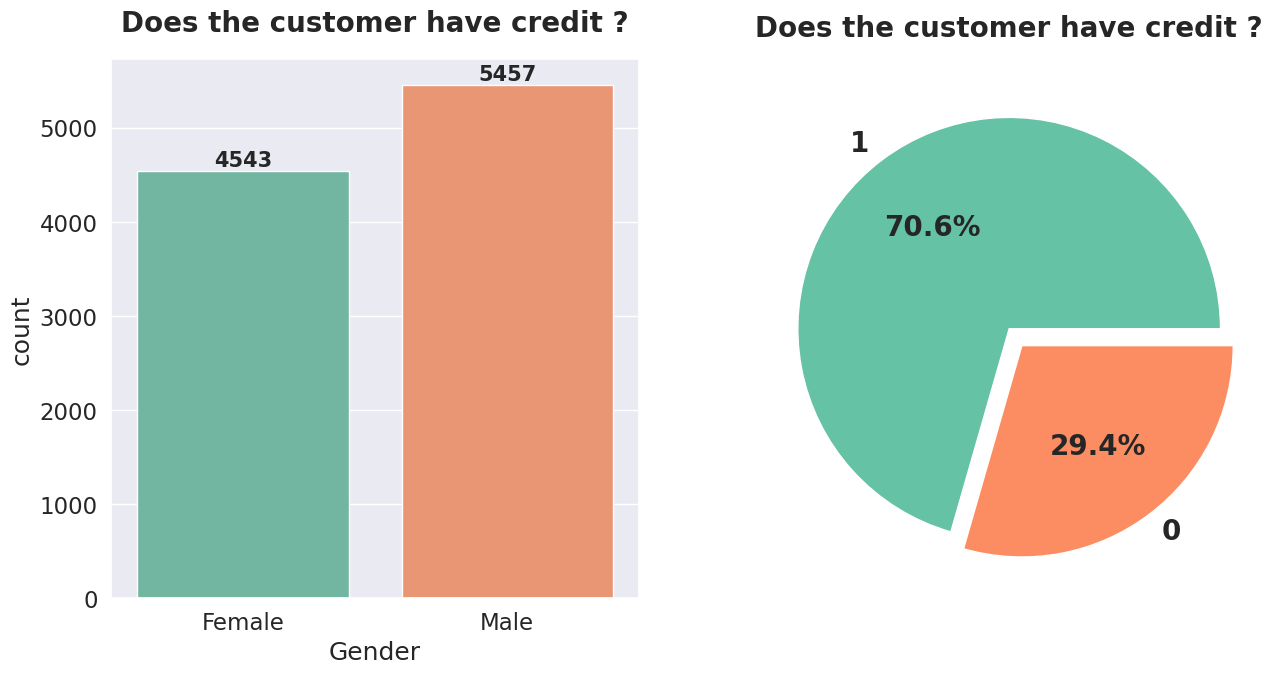

In [ ]:
count=df['HasCrCard'].value_counts()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
ax=sns.countplot(data=df,x='Gender',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=15)
plt.title("Does the customer have credit ?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values,labels=count.index,autopct='%1.1f%%',colors=sns.set_palette("Set2"),
        textprops={'fontweight':'black','size':20},explode=[0,0.1])
plt.title("Does the customer have credit ?",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


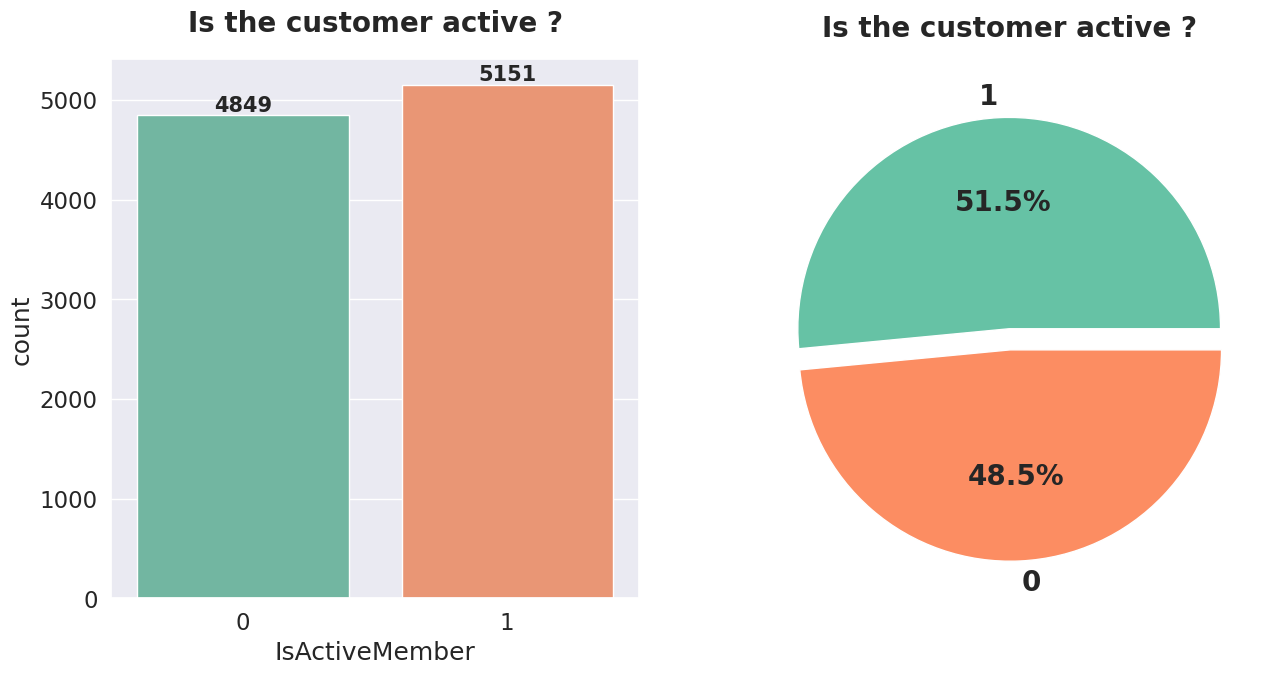

In [ ]:
count=df['IsActiveMember'].value_counts()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
ax=sns.countplot(data=df,x='IsActiveMember',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=15)
plt.title("Is the customer active ?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values,labels=count.index,autopct='%1.1f%%',colors=sns.set_palette("Set2"),
        textprops={'fontweight':'black','size':20},explode=[0,0.1])
plt.title("Is the customer active ?",fontweight="black",size=20,pad=20)

plt.show()

In [ ]:
df['EstimatedSalary'].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


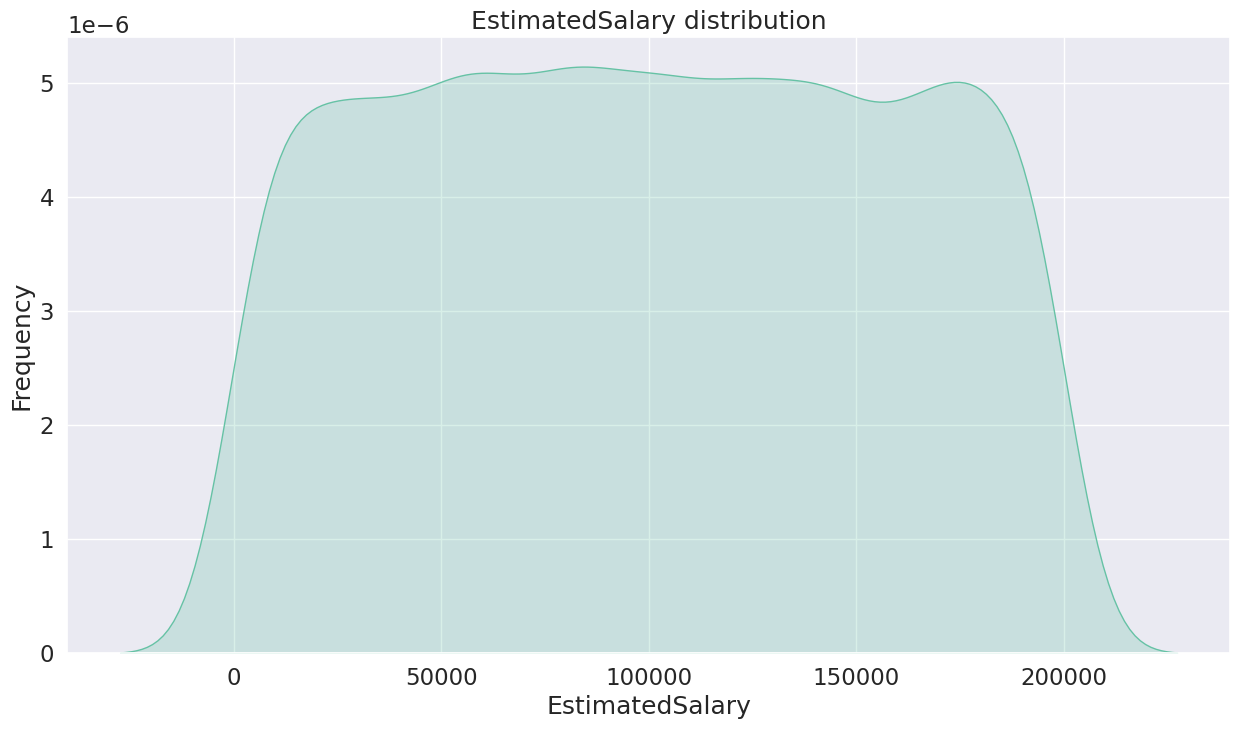

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['EstimatedSalary'],fill=True)
plt.title('EstimatedSalary distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


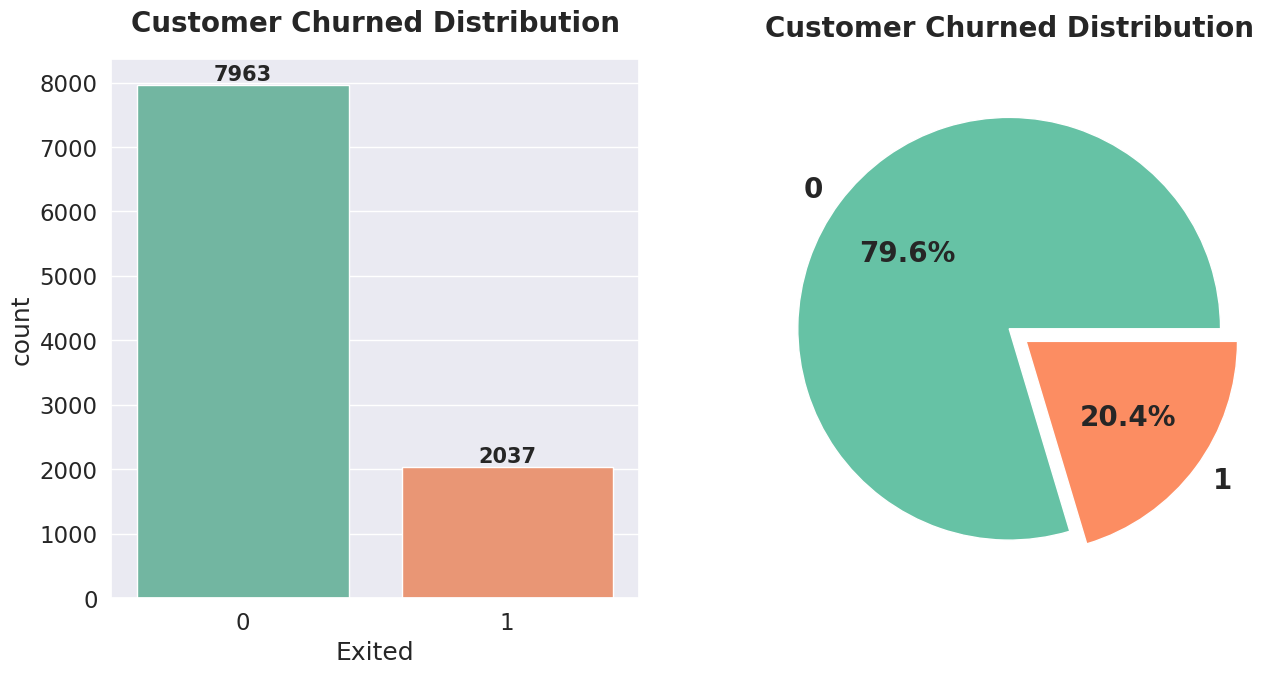

In [ ]:
count=df['Exited'].value_counts()
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
ax=sns.countplot(data=df,x='Exited',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight='black', size=15)
plt.title("Customer Churned Distribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values,labels=count.index,autopct='%1.1f%%',colors=sns.set_palette("Set2"),
        textprops={'fontweight':'black','size':20},explode=[0,0.1])
plt.title("Customer Churned Distribution",fontweight="black",size=20,pad=20)

plt.show()

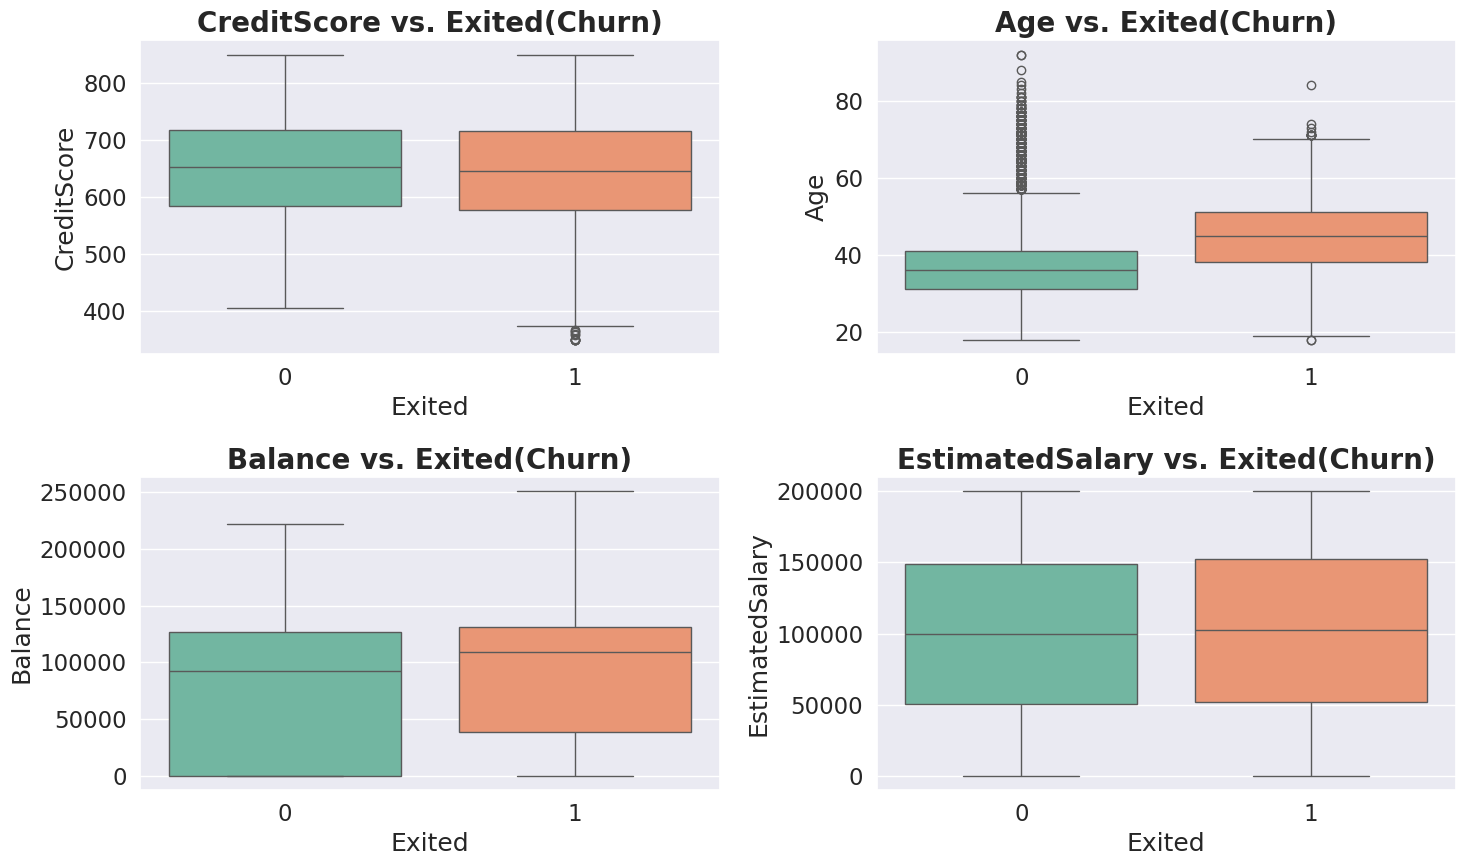

In [ ]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='Exited',y='CreditScore',palette="Set2")
plt.title('CreditScore vs. Exited(Churn)',fontweight="black",size=20)

plt.subplot(2,2,2)
sns.boxplot(data=df,x='Exited',y='Age',palette="Set2")
plt.title('Age vs. Exited(Churn)',fontweight="black",size=20)

plt.subplot(2,2,3)
sns.boxplot(data=df,x='Exited',y='Balance',palette="Set2")
plt.title('Balance vs. Exited(Churn)',fontweight="black",size=20)

plt.subplot(2,2,4)
sns.boxplot(data=df,x='Exited',y='EstimatedSalary',palette="Set2")
plt.title('EstimatedSalary vs. Exited(Churn)',fontweight="black",size=20)

plt.tight_layout()
plt.show()

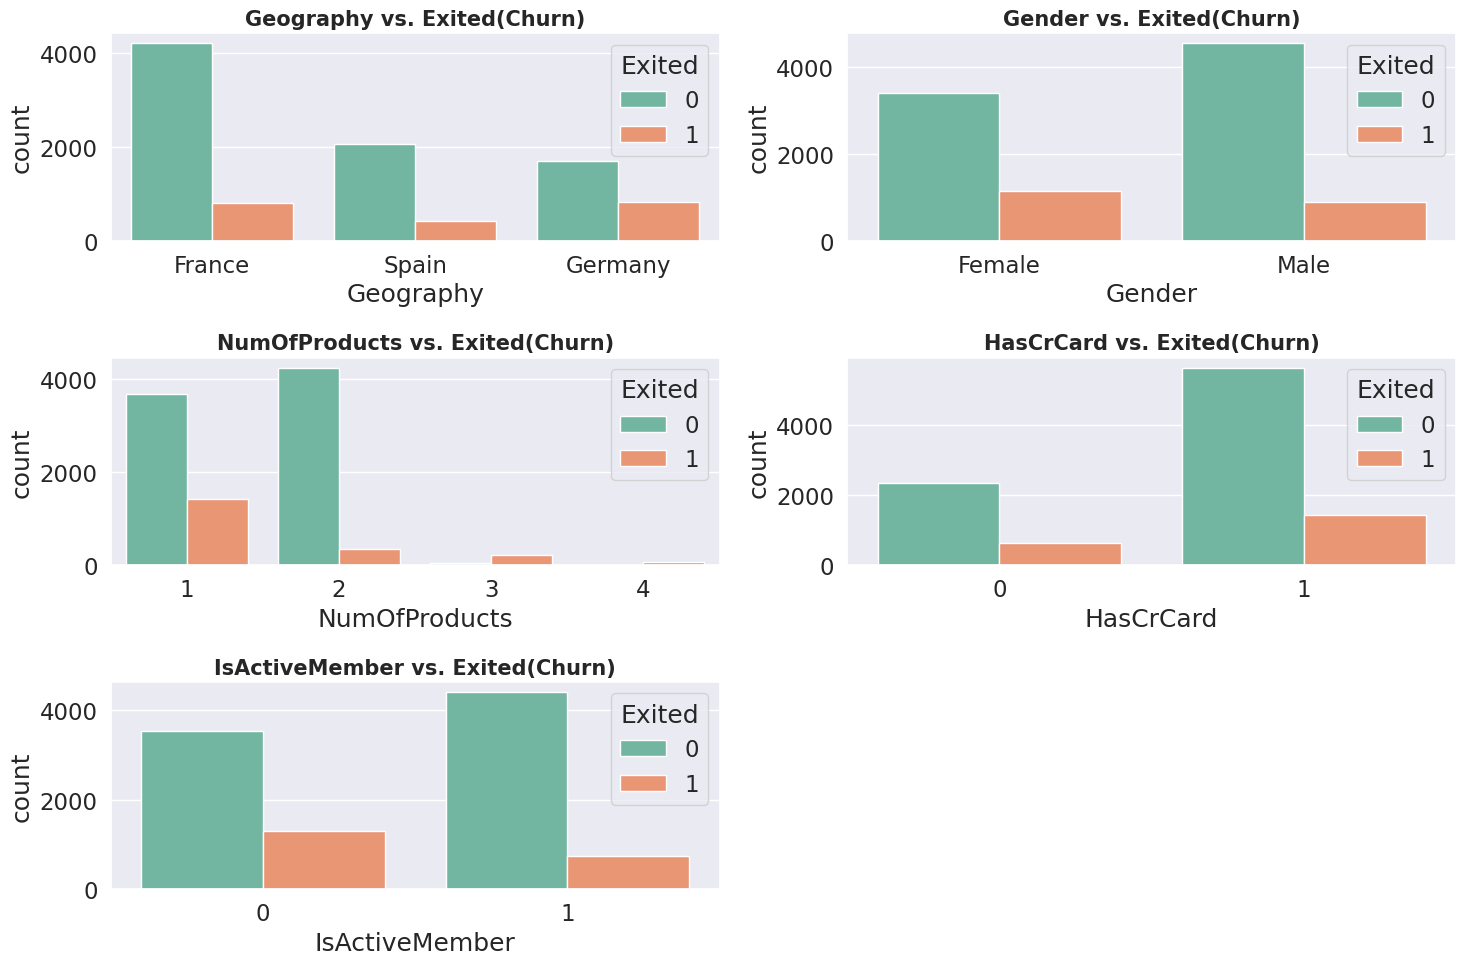

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(data=df,x='Geography',hue='Exited',palette="Set2")
plt.title('Geography vs. Exited(Churn)',fontweight="black",size=15)

plt.subplot(3,2,2)
sns.countplot(data=df,x='Gender',hue='Exited',palette="Set2")
plt.title('Gender vs. Exited(Churn)',fontweight="black",size=15)

plt.subplot(3,2,3)
sns.countplot(data=df,x='NumOfProducts',hue='Exited',palette="Set2")
plt.title('NumOfProducts vs. Exited(Churn)',fontweight="black",size=15)

plt.subplot(3,2,4)
sns.countplot(data=df,x='HasCrCard',hue='Exited',palette="Set2")
plt.title('HasCrCard vs. Exited(Churn)',fontweight="black",size=15)

plt.subplot(3,2,5)
sns.countplot(data=df,x='IsActiveMember',hue='Exited',palette="Set2")
plt.title('IsActiveMember vs. Exited(Churn)',fontweight="black",size=15)

plt.tight_layout()
plt.show()

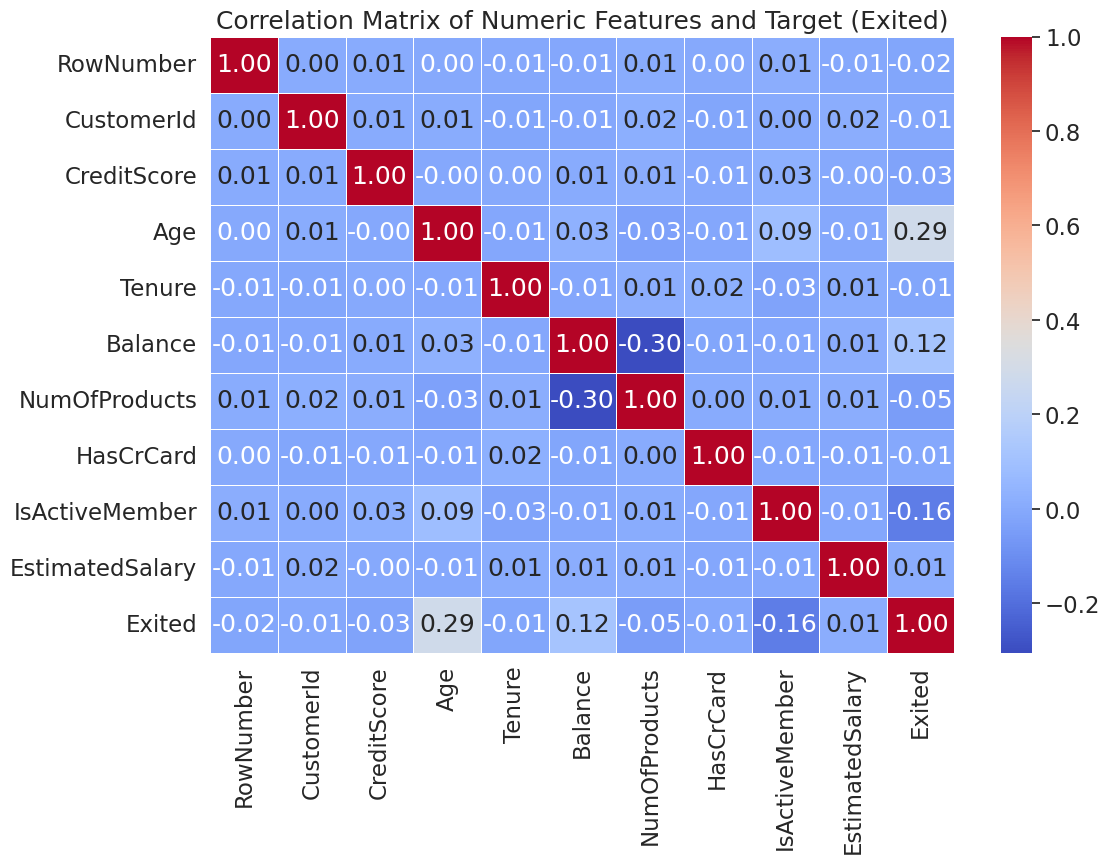

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features and Target (Exited)')
plt.show()

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
x=pd.get_dummies(x,columns=['Geography','Gender'],drop_first=False)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [ ]:
scaler = StandardScaler()

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(x_train, y_train)

print("Resampled X_train shape:", X_train.shape)
print("Resampled y_train shape:", y_train.shape)

Resampled X_train shape: (11094, 13)
Resampled y_train shape: (11094,)


In [ ]:
lr = LogisticRegression( max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr.score(X_train, y_train)

0.7371552190373175

In [ ]:
lr.score(x_test, y_test)

0.728

In [ ]:
y_pred = lr.predict(x_test)

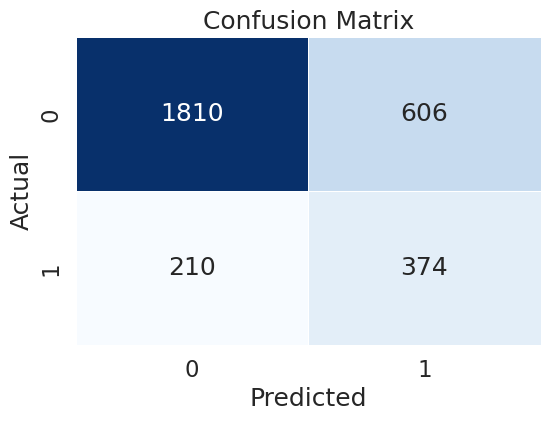

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [ 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svc = SVC()

In [ ]:
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
print(X_train.dtypes)
print(y_train.dtype)

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
Gender_Female           bool
Gender_Male             bool
dtype: object
int64


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
nan


In [ ]:
best_model = grid_search.best_estimator_

print("Best Model:", best_model)


Best Model: SVC()


In [ ]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model.get_params())

Best Model: {'handle': <pylibraft.common.handle.Handle object at 0x7e2740e0c4e0>, 'verbose': 4, 'output_type': 'input', 'C': 1, 'kernel': 'linear', 'degree': 2, 'gamma': 0.01, 'coef0': 0.0, 'tol': 0.001, 'cache_size': 1024.0, 'max_iter': -1, 'nochange_steps': 1000, 'probability': False, 'random_state': None, 'class_weight': None, 'multiclass_strategy': 'ovo'}


In [ ]:
best_model.score(X_train, y_train)

0.7685235142707825

In [ ]:
best_model.score(x_test, y_test)

0.7473333477973938

In [ ]:
y_pred = best_model.predict(x_test)

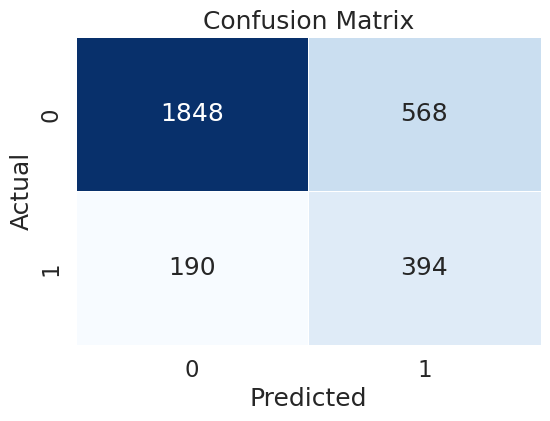

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
knn =KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.9082386875788715

In [ ]:
knn.score(x_test, y_test)

0.7486666666666667

In [ ]:
y_pred = knn.predict(x_test)

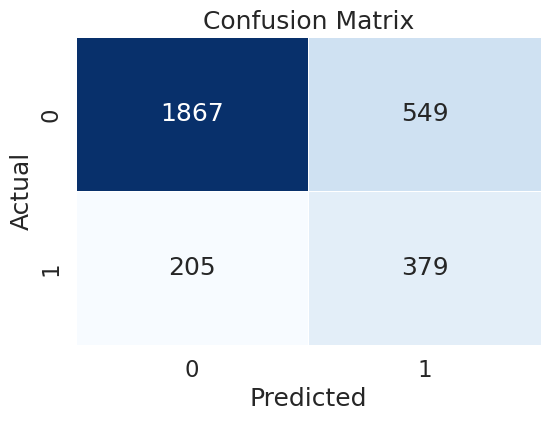

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
clf =DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

In [ ]:
clf.score(X_train, y_train)

0.7221020371371912

In [ ]:
clf.score(x_test, y_test)

0.7106666666666667

In [ ]:
y_pred = clf.predict(x_test)

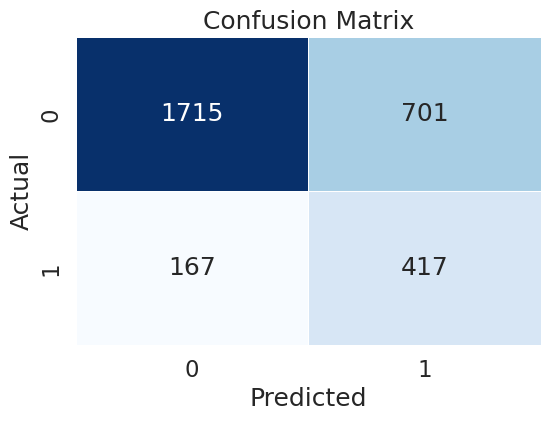

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
RF_classifier =RandomForestClassifier(min_impurity_decrease=0.01)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01)

In [ ]:
RF_classifier.score(X_train, y_train)

0.7657292230034253

In [ ]:
RF_classifier.score(x_test, y_test)

0.765

In [ ]:
y_pred = RF_classifier.predict(x_test)

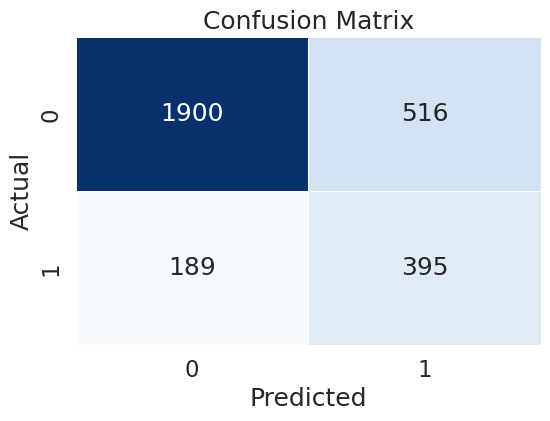

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
base_classifier = DecisionTreeClassifier(random_state=42)

bagged_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42, n_jobs=-1)

bagged_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
bagged_classifier.score(X_train, y_train)

0.9999098611862268

In [ ]:
bagged_classifier.score(x_test, y_test)

0.8346666666666667

In [ ]:
y_pred_bg = bagged_classifier.predict(x_test)

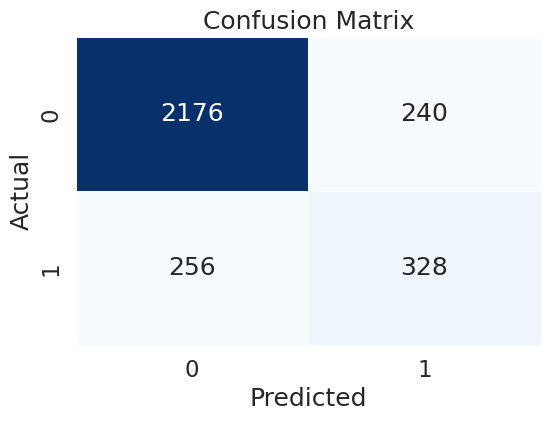

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_bg)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
ET_classifier =ExtraTreesClassifier(min_impurity_decrease=0.01)

In [ ]:
ET_classifier.fit(X_train, y_train)
ET_classifier.score(X_train, y_train)

0.7286821705426356

In [ ]:
ET_classifier.score(x_test, y_test)

0.7066666666666667

In [ ]:
y_pred_et = ET_classifier.predict(x_test)

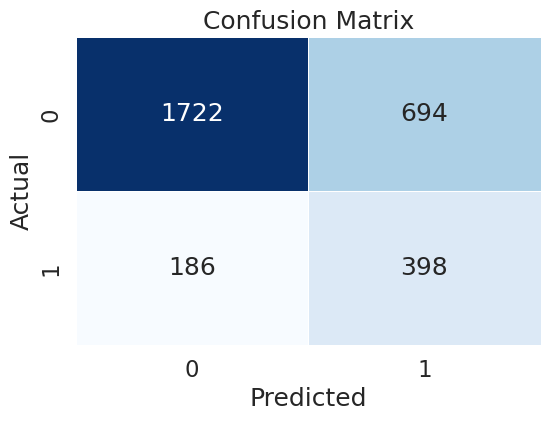

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_et)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
AB_classifier = AdaBoostClassifier(n_estimators=100)

In [ ]:
AB_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
AB_classifier.score(X_train, y_train)

0.797277807824049

In [ ]:
AB_classifier.score(x_test, y_test)

0.79

In [ ]:
y_pred_ab= AB_classifier.predict(x_test)

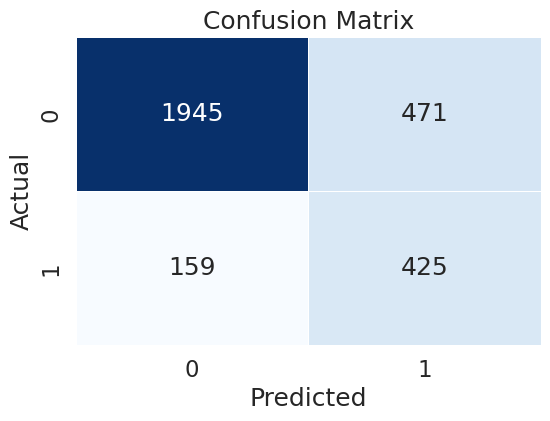

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_ab)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
XGB_classifier =XGBClassifier(n_estimators=200)

In [ ]:
XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
XGB_classifier.score(X_train, y_train)

0.9934198665945556

In [ ]:
XGB_classifier.score(x_test, y_test)

0.856

In [ ]:
y_pred_xgb= XGB_classifier.predict(x_test)

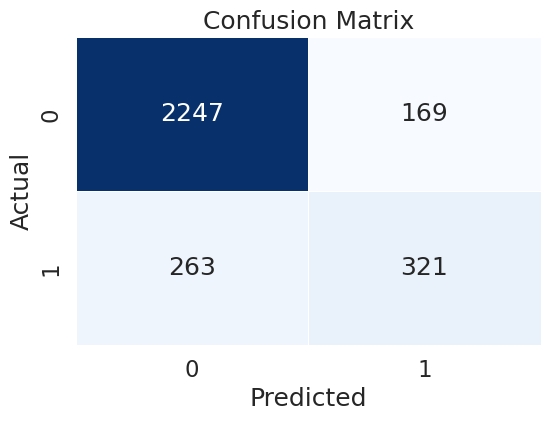

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
catboost = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')


catboost.fit(X_train, y_train)

0:	learn: 0.6551470	total: 7.09ms	remaining: 702ms
1:	learn: 0.6249217	total: 14.7ms	remaining: 719ms
2:	learn: 0.5991506	total: 20.1ms	remaining: 651ms
3:	learn: 0.5787155	total: 31.7ms	remaining: 761ms
4:	learn: 0.5586015	total: 44.4ms	remaining: 843ms
5:	learn: 0.5421006	total: 53.6ms	remaining: 840ms
6:	learn: 0.5287575	total: 68.3ms	remaining: 908ms
7:	learn: 0.5164778	total: 84ms	remaining: 965ms
8:	learn: 0.5067958	total: 95.5ms	remaining: 966ms
9:	learn: 0.4971276	total: 109ms	remaining: 982ms
10:	learn: 0.4894536	total: 117ms	remaining: 949ms
11:	learn: 0.4826146	total: 126ms	remaining: 923ms
12:	learn: 0.4762350	total: 131ms	remaining: 875ms
13:	learn: 0.4694950	total: 140ms	remaining: 857ms
14:	learn: 0.4641154	total: 150ms	remaining: 849ms
15:	learn: 0.4596677	total: 156ms	remaining: 822ms
16:	learn: 0.4554086	total: 165ms	remaining: 808ms
17:	learn: 0.4522563	total: 172ms	remaining: 782ms
18:	learn: 0.4487958	total: 180ms	remaining: 768ms
19:	learn: 0.4457420	total: 189ms	

In [ ]:
catboost.score(X_train, y_train)


np.float64(0.8646115017126375)

In [ ]:
catboost.score(x_test, y_test)

np.float64(0.8383333333333334)

In [ ]:
y_pred_catboost=catboost.predict(x_test)

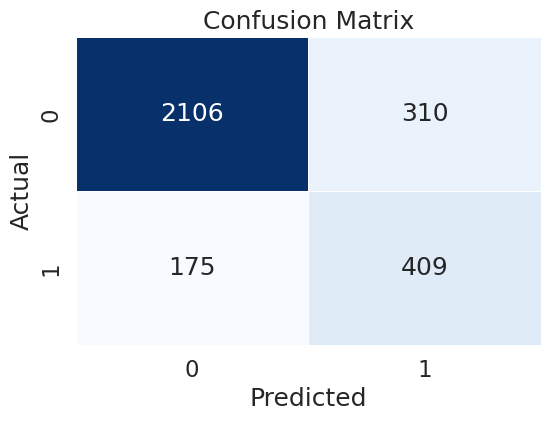

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
LGBM_classifier = LGBMClassifier(n_estimators=200)

LGBM_classifier.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 5547, number of negative: 5547
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 11094, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=200)

In [ ]:
LGBM_classifier.score(X_train,y_train)

0.9652064178835407

In [ ]:
LGBM_classifier.score(x_test,y_test)

0.8663333333333333

In [ ]:
y_pred_lgbm = LGBM_classifier.predict(x_test)

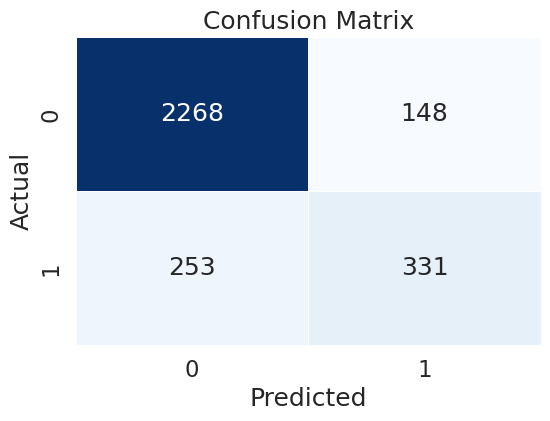

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()